## import

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

%config InlineBackend.figure_format = 'retina'                                    # so you can see plots in HD :) 
#colors = sns.color_palette("colorblind").as_hex()
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## explore CMB maps

In [9]:
# define paths to datafiles
map_hm1 = 'data/HFI_SkyMap_143_2048_R3.01_halfmission-1.fits'              # map for half mission 1 143 GHZ
map_hm2 = 'data/HFI_SkyMap_143_2048_R3.01_halfmission-2.fits'
mask_gp = 'data/HFI_Mask_GalPlane-apo5_2048_R2.00.fits'              # galactic plane mask
mask_ps = 'data/HFI_Mask_PointSrc_2048_R2.00.fits'                   # mask point source

# extract primary headers in each fits file
second_hdus = []
event_hdus = []


if True:
    for item in [map_hm1, map_hm2, mask_gp, mask_ps]:
        # open each file, print important info, and extract primary data
        hdul_i = fits.open(item)
        hdul_i.info()
        print('='*90)

        #events = Table.read(item, hdu=1)
        #event_hdus.append(events)
        second_hdus.append(hdul_i[1].data)
    
#events = Table.read(map_hm1, hdu=1)

Filename: data/HFI_SkyMap_143_2048_R3.01_halfmission-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FREQ-MAP      1 BinTableHDU     75   50331648R x 10C   [E, E, E, J, E, E, E, E, E, E]   
Filename: data/HFI_SkyMap_143_2048_R3.01_halfmission-2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FREQ-MAP      1 BinTableHDU     75   50331648R x 10C   [E, E, E, J, E, E, E, E, E, E]   
Filename: data/HFI_Mask_GalPlane-apo5_2048_R2.00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  GAL-MASK      1 BinTableHDU     54   50331648R x 8C   [E, E, E, E, E, E, E, E]   
Filename: data/HFI_Mask_PointSrc_2048_R2.00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SRC-INT       1 BinTableHDU     49   50331648

In [18]:
events

I_STOKES,Q_STOKES,U_STOKES,HITS,II_COV,IQ_COV,IU_COV,QQ_COV,QU_COV,UU_COV
Kcmb,Kcmb,Kcmb,,Kcmb^2,Kcmb^2,Kcmb^2,Kcmb^2,Kcmb^2,Kcmb^2
float32,float32,float32,int32,float32,float32,float32,float32,float32,float32
0.0027260943,3.3351902e-05,-1.3077862e-05,876,7.049744e-10,1.4236673e-10,-1.1294898e-10,2.9556113e-09,-1.1944391e-11,2.9654796e-09
0.0029975877,9.240903e-05,5.7216388e-05,907,6.7086103e-10,1.4272611e-10,-9.082338e-11,2.933092e-09,4.9399162e-11,2.9220921e-09
0.0027465834,0.00021077467,-4.23078e-06,812,7.4237516e-10,5.2963203e-11,-1.6235496e-10,3.2959286e-09,5.835569e-11,3.7227583e-09
0.003102309,1.5911085e-06,-2.9676345e-05,794,7.654566e-10,4.842008e-11,-1.4748044e-10,3.2717216e-09,2.818815e-10,3.6813552e-09
0.0037490525,9.514867e-05,5.8601636e-05,869,7.1018447e-10,1.547212e-10,-1.3678662e-10,2.9939964e-09,6.4725246e-11,3.0396508e-09
0.0050032646,0.00010021655,-0.00016417592,812,7.5026535e-10,1.2010735e-10,-1.873856e-10,3.1479297e-09,1.55014e-10,3.3330345e-09
0.0038362984,0.0001307076,2.4433974e-05,740,8.2500023e-10,6.3741276e-11,-1.5435571e-10,3.5436065e-09,5.0907584e-10,4.1391472e-09
0.0050591715,8.9102854e-05,-0.00011625136,758,8.0132134e-10,8.0257224e-11,-1.06781084e-10,3.6264824e-09,6.4020583e-10,4.3233337e-09


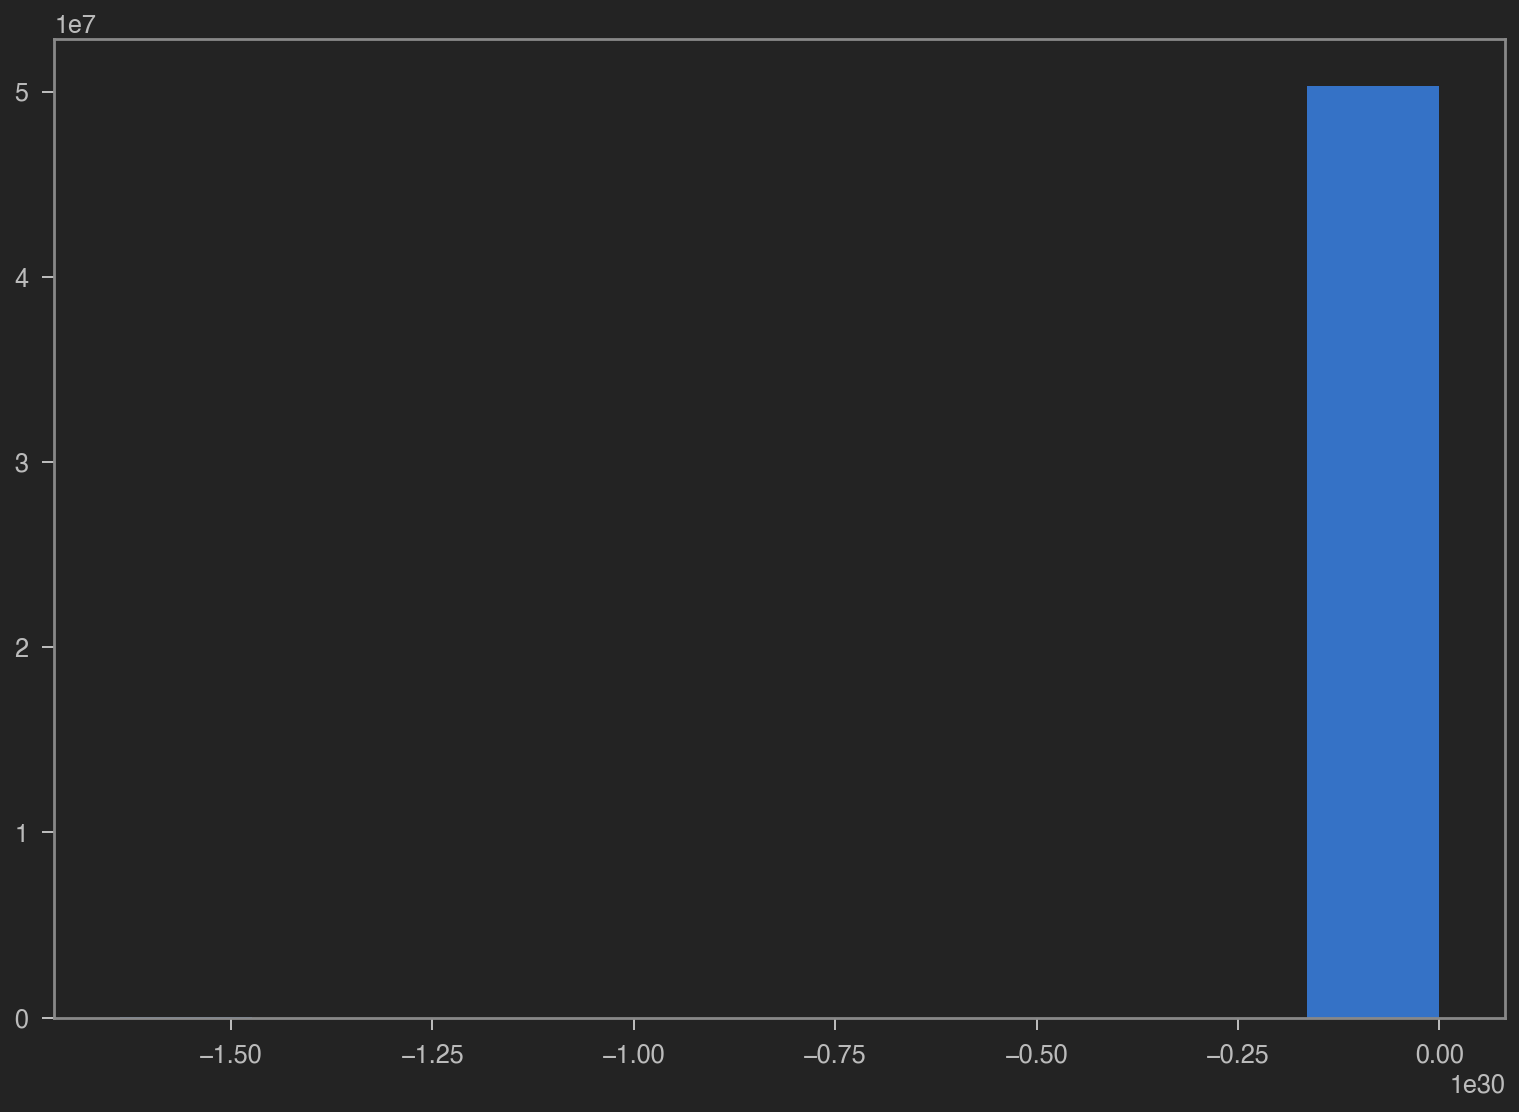

In [30]:
i_stokes = events['I_STOKES']

plt.figure(figsize=(13,9))
plt.hist(i_stokes)
plt.show()

In [29]:
q_stokes = events['Q_STOKES']

In [28]:
u_stokes = np.array(events['U_STOKES'])

In [13]:
events_gp = Table.read(mask_gp, hdu=1)
events_gp

GAL020,GAL040,GAL060,GAL070,GAL080,GAL090,GAL097,GAL099
float32,float32,float32,float32,float32,float32,float32,float32
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
events_ps = Table.read(mask_ps, hdu=1)
events_ps

F100,F143,F217,F353,F545,F857
uint8,uint8,uint8,uint8,uint8,uint8
0,0,1,1,0,0
0,0,0,1,0,0
0,0,1,1,0,0
0,0,1,1,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,1,0,0
